In [1]:
!rm -rf waymo-od > /dev/null
!git clone https://github.com/waymo-research/waymo-open-dataset.git waymo-od
!cd waymo-od && git branch -a
!cd waymo-od && git checkout remotes/origin/master
!pip3 install --upgrade pip

Cloning into 'waymo-od'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 389 (delta 7), reused 20 (delta 6), pack-reused 363
Receiving objects: 100% (389/389), 14.01 MiB | 586.00 KiB/s, done.
Resolving deltas: 100% (199/199), done.
* master
  remotes/origin/HEAD -> origin/master
  remotes/origin/master
  remotes/origin/r1.0
  remotes/origin/r1.0-tf1.15
Note: checking out 'remotes/origin/master'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at 6203e4e Merged commit includes the following changes: 271703159  by Waymo Resear

In [2]:
!pip3 install waymo-open-dataset
import os
import tensorflow as tf
import math
import numpy as np
import itertools

tf.enable_eager_execution()

from waymo_open_dataset.utils import range_image_utils
from waymo_open_dataset.utils import transform_utils
from waymo_open_dataset.utils import  frame_utils
from waymo_open_dataset import dataset_pb2 as open_dataset

In [3]:
import tensorflow as tf
import tensornets as nets
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

In [4]:
plt.rcParams.update({'figure.max_open_warning': 0})

In [5]:
FILENAME = '/home/arkil/Downloads/train/segment1.tfrecord'
dataset = tf.data.TFRecordDataset(FILENAME, compression_type='')
for data in dataset:
    frame = open_dataset.Frame()
    context = open_dataset.Context()
    frame.ParseFromString(bytearray(data.numpy()))
    break

In [6]:
(range_images, camera_projections,
 range_image_top_pose) = frame_utils.parse_range_image_and_camera_projection(
    frame)

In [7]:
print(frame.pose)

transform: 0.986656645125256
transform: -0.1625245518358105
transform: 0.009717750806836737
transform: -1706.8849680591247
transform: 0.1626385556799923
transform: 0.9866079222418024
transform: -0.012389833575946347
transform: 14019.754138055878
transform: -0.007573957783145835
transform: 0.013804992585385483
transform: 0.9998760209862103
transform: -14.304
transform: 0.0
transform: 0.0
transform: 0.0
transform: 1.0



In [8]:
print(frame.camera_labels)

[name: FRONT
labels {
  box {
    center_x: 1136.23041
    center_y: 694.1364525394561
    width: 123.79164000000003
    length: 138.3182099999999
  }
  type: TYPE_VEHICLE
  id: "0199ab2c-172f-40b4-a990-1cfb192057e9"
  detection_difficulty_level: LEVEL_2
  tracking_difficulty_level: LEVEL_2
}
labels {
  box {
    center_x: 1073.703
    center_y: 624.64251
    width: 29.053139999999985
    length: 8.842259999999897
  }
  type: TYPE_PEDESTRIAN
  id: "04597327-9c04-4f4c-8ba4-404afde31ef6"
}
labels {
  box {
    center_x: 893.0682515786036
    center_y: 615.1686642106981
    width: 5.684309999999982
    length: 8.84226000000001
  }
  type: TYPE_VEHICLE
  id: "10fcef2b-b6d4-4c04-a0d3-c8d1534052b3"
}
labels {
  box {
    center_x: 975.80655
    center_y: 630.32682
    width: 27.15836999999999
    length: 41.68493999999998
  }
  type: TYPE_VEHICLE
  id: "121b7e38-1109-4dce-93f5-75c737d0d3a6"
  detection_difficulty_level: LEVEL_2
  tracking_difficulty_level: LEVEL_2
}
labels {
  box {
    cent

In [9]:
print(frame.context)

name: "15533468984793020049_800_000_820_000"
camera_calibrations {
  name: FRONT
  intrinsic: 2055.556149361639
  intrinsic: 2055.556149361639
  intrinsic: 939.6574698861468
  intrinsic: 641.0721821943271
  intrinsic: 0.03231600849798887
  intrinsic: -0.3214124825527059
  intrinsic: 0.0007932583953709973
  intrinsic: -0.0006257493541333847
  intrinsic: 0.0
  extrinsic {
    transform: 0.9998926849887427
    transform: -0.005993208400016058
    transform: 0.0133678704017097
    transform: 1.5389142447125008
    transform: 0.006042236521329663
    transform: 0.9999751560547995
    transform: -0.003630241176497072
    transform: -0.02363394083934774
    transform: -0.013345781499156929
    transform: 0.003710623431877962
    transform: 0.999904056092345
    transform: 2.115270572975561
    transform: 0.0
    transform: 0.0
    transform: 0.0
    transform: 1.0
  }
  width: 1920
  height: 1280
  rolling_shutter_direction: LEFT_TO_RIGHT
}
camera_calibrations {
  name: FRONT_LEFT
  intrinsic

In [10]:
print(frame.laser_labels)

[box {
  center_x: -28.338726849590785
  center_y: 11.328084554135785
  center_z: 2.5932474051691656
  width: 0.5365486351492759
  length: 0.08681592360396494
  height: 0.5084935709547267
  heading: 0.031108600881551762
}
metadata {
  speed_x: 0.0
  speed_y: -3.3780906743667005e-28
  accel_x: 0.0
  accel_y: 4.222613594645759e-28
}
type: TYPE_SIGN
id: "3AHwfqVJ9B0qtGtepNcUPg"
, box {
  center_x: 1.9909813427652807
  center_y: 11.226458077982898
  center_z: 2.590419595777064
  width: 0.4933451851084019
  length: 0.0632066757010606
  height: 0.33860708225524405
  heading: -3.1373309627033503
}
metadata {
  speed_x: -1.5482915595883694e-28
  speed_y: 6.756181348733401e-28
  accel_x: 1.9353645648421791e-28
  accel_y: -8.445227189291518e-28
}
type: TYPE_SIGN
id: "4EhMVvUGUMMw4y-Ag1ev3g"
, box {
  center_x: 4.037055842276459
  center_y: -5.018589449480714
  center_z: 0.6372975277034811
  width: 0.311598103784555
  length: 0.08555501252316908
  height: 0.43130957492416755
  heading: 2.18710759

# Segment 1 Images

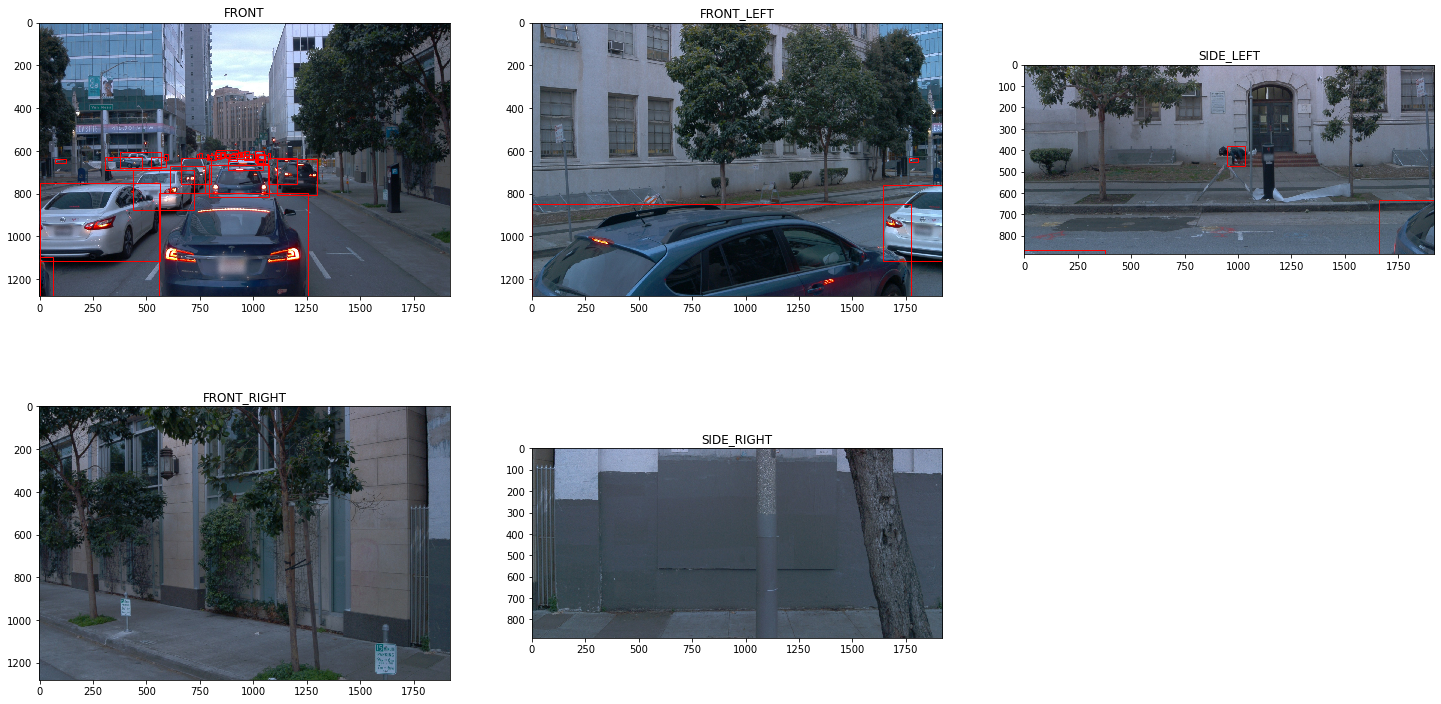

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def show_camera_image(camera_image, camera_labels, layout, cmap=None):
    ax = plt.subplot(*layout)
    for camera_labels in frame.camera_labels:
        if camera_labels.name != camera_image.name:
            continue
        i = 0 
        for label in camera_labels.labels:
            
            ax.add_patch(patches.Rectangle(
                xy=(label.box.center_x - 0.5 * label.box.length,
                    label.box.center_y - 0.5 * label.box.width),
                width=label.box.length,
                height=label.box.width,
                linewidth=1,
                edgecolor='red',
                facecolor='none'))

    plt.imshow(tf.image.decode_jpeg(camera_image.image), cmap=cmap)
    plt.title(open_dataset.CameraName.Name.Name(camera_image.name))
    plt.grid(False)    
plt.figure(figsize=(25, 20))

for index, image in enumerate(frame.images):
      show_camera_image(image, frame.camera_labels, [3, 3, index+1])

In [12]:
# def save_camera_image(camera_image, camera_labels, layout, cmap=None):
#     ax = plt.subplot(*layout)
#     for camera_labels in frame.camera_labels:
#         if camera_labels.name != camera_image.name:
#             continue
#         i = 0 
#         for label in camera_labels.labels:
            
#             ax.add_patch(patches.Rectangle(
#                 xy=(label.box.center_x - 0.5 * label.box.length,
#                     label.box.center_y - 0.5 * label.box.width),
#                 width=label.box.length,
#                 height=label.box.width,
#                 linewidth=1,
#                 edgecolor='red',
#                 facecolor='none'))
#             plt.imshow(tf.image.decode_jpeg(camera_image.image), cmap=cmap)
#             plt.grid(False) 
#             plt.savefig('seg'+ str(i)+'.jpg')
#             i+=1
#             plt.figure(figsize=(25, 20))
            
# for index, image in enumerate(frame.images):
#       save_camera_image(image, frame.camera_labels, [3, 3, index+1])

In [13]:
tf.compat.v1.disable_eager_execution()

# Tensornets YOLO3COCO

In [14]:
inputs = tf.placeholder(tf.float32, [None, 416, 416, 3]) 
model = nets.YOLOv3COCO(inputs, nets.Darknet19)

# Mapping labels in coco.names

In [15]:
classes={'2':'TYPE_VEHICLE','0':'TYPE_PEDESTRIAN','11':'TYPE_SIGN','1':'TYPE_CYCLIST'}
list_of_classes=[1,0,11,2]

In [ ]:
frame=cv2.imread("/home/arkil/my_project_dir/seg3.jpg",1)
with tf.Session() as sess:
    sess.run(model.pretrained())
    img=cv2.resize(frame,(416,416))
    imge=np.array(img).reshape(-1,416,416,3)
    start_time=time.time()
    preds = sess.run(model.preds, {inputs: model.preprocess(imge)})
    print("--- %s seconds ---" % (time.time() - start_time)) 
    boxes = model.get_boxes(preds, imge.shape[1:3])
    cv2.namedWindow('op',cv2.WINDOW_NORMAL)
    cv2.resizeWindow('op', 700,700)
    boxes1=np.array(boxes)
    for j in list_of_classes:
        count =0
        if str(j) in classes:
            lab=classes[str(j)]
        if len(boxes1) !=0:        
            for i in range(len(boxes1[j])):
                box=boxes1[j][i]    
                if boxes1[j][i][4]>=.40:            
                    count += 1     
                    cv2.rectangle(img,(box[0],box[1]),(box[2],box[3]),(0,255,0),1)
                    cv2.putText(img, lab, (box[0],box[1]), cv2.FONT_HERSHEY_SIMPLEX, .5, (0, 0, 255), lineType=cv2.LINE_AA)
            print(lab,": ",count)
    
    plt.figure(figsize=(15, 10))          
    plt.imshow(img)
    cv2.imshow("op",img)
    cv2.waitKey(0)

--- 1.0339479446411133 seconds ---
TYPE_CYCLIST :  0
TYPE_PEDESTRIAN :  1
TYPE_SIGN :  0
TYPE_VEHICLE :  15
